Hey Everyone! 

Gonna be honest, my code is 500% all over the place in terms of organization. 

If you're on my team and need my dataframe, scroll to the bottom of the page. 

If you're a TA and you're grading this, welcome! Sorry for the disorganization! 

Here I'm looking at the value of all Basement values to our model. 

I'm also looking at some miscellaneous ones (Extra Features, Sale Type, Year/Month, etc.) 

In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import math


from matplotlib import pyplot as plt
plt.style.use('ggplot')

train_df = pd.read_csv("train.csv")
train_df.head()

test_df = pd.read_csv("test.csv")

train_columns = train_df.columns.tolist
train_columns

In [10]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [13]:
np.sum(train_df.isnull())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [18]:
train_df[['YrSold']]

all_years = list(train_df['YrSold'])
#print(all_companies)

year_dict = {}
for year in all_years:
    year_dict[year] = all_years.count(year)

year_dict

{2008: 304, 2007: 329, 2006: 314, 2009: 338, 2010: 175}

In [24]:
train_df[['MoSold']]

all_months = list(train_df['MoSold'])
#print(all_companies)

month_dict = {}
for month in all_months:
    month_dict[month] = all_months.count(month)

month_dict

{2: 52,
 5: 204,
 9: 63,
 12: 59,
 10: 89,
 8: 122,
 11: 79,
 4: 141,
 1: 58,
 7: 234,
 3: 106,
 6: 253}

(array([ 58.,  52., 106., 141., 204., 253., 234., 122.,  63.,  89., 138.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 <a list of 11 Patch objects>)

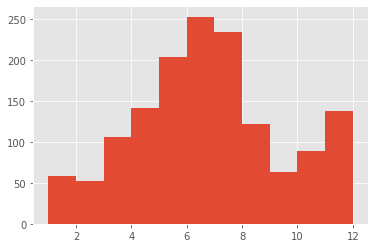

In [99]:
plt.hist(train_df['MoSold'], bins = 11)

#train_df.boxplot(by='MoSold', column='SalePrice')

#train_df.boxplot(by="Neighborhood", column="SalePrice")

In [4]:
#plt.hist(train_df['YrSold'], bins = 4)

# yearly = train_df.groupby("YrSold")
# yearly.SalePrice.describe() #all means within $10,000 of each other

monthly = train_df.groupby("MoSold")
monthly.SalePrice.describe() #all means within $25,000 of each other

,count,mean,std,min,25%,50%,75%,max
MoSold,,,,,,,,
1,58.0,183256.258621,121381.083473,39300.0,118250.0,151650.0,215500.0,755000.0
2,52.0,177882.000000,52960.863135,93000.0,129175.0,173250.0,211225.0,320000.0
3,106.0,183253.924528,86488.445599,52500.0,133725.0,165250.0,200593.0,611657.0
4,141.0,171503.262411,77147.323106,68400.0,124000.0,147000.0,202900.0,555000.0
5,204.0,172307.269608,68614.545198,37900.0,127750.0,154000.0,204812.5,430000.0
6,253.0,177395.735178,69453.085881,55993.0,136000.0,163000.0,204000.0,538000.0
7,234.0,186331.192308,91772.125395,40000.0,132625.0,165195.0,212975.0,745000.0
8,122.0,184651.827869,73215.986647,64500.0,126250.0,174450.0,237639.5,426000.0
9,63.0,195683.206349,83149.017391,67000.0,135000.0,185900.0,231585.0,465000.0


In [32]:
months = train_df[["MoSold"]]
years = train_df[["YrSold"]]
sale_price = train_df[["SalePrice"]]

In [33]:
#you need to dummify most of the basement variables if you want this to work 

ols = linear_model.LinearRegression()

basement_features = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]
scores = {}
from sklearn.metrics import r2_score
for feature_name in basement_features:
                basement_df  = train_df.copy()
                feature = basement_df[feature_name].copy()
                basement_df.drop(feature_name, axis=1, inplace=True)
                ols.fit(basement_df, feature)
                scores[feature_name] = ols.score(basement_df, feature) 

ValueError: could not convert string to float: 'RL'

{'Pave': 1454, 'Grvl': 6}
{'AllPub': 1459, 'NoSeWa': 1}


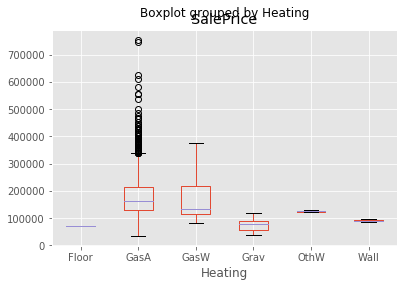

In [66]:
all_street = list(train_df['Street'])

street_dict = {}
for street in all_street:
    street_dict[street] = all_street.count(street)

print(street_dict)

all_utilities = list(train_df['Utilities'])

utilities_dict = {}
for utility in all_utilities:
    utilities_dict[utility] = all_utilities.count(utility)
print(utilities_dict)

train_df.boxplot(by="Heating", column="SalePrice")


In [63]:
group = train_df.groupby("Heating")
print(group.SalePrice.median())
print(group.SalePrice.mean())


Heating
Floor     72500
GasA     164500
GasW     134950
Grav      79000
OthW     125750
Wall      91450
Name: SalePrice, dtype: int64
Heating
Floor     72500.000000
GasA     182021.195378
GasW     166632.166667
Grav      75271.428571
OthW     125750.000000
Wall      92100.000000
Name: SalePrice, dtype: float64


In [86]:
print(round(train_df.SalePrice.describe()))
print(180921 + (3*79443))

#the minimum value lies within 2 SD of the mean, can't really consider any super low values to be outliers


count      1460.0
mean     180921.0
std       79443.0
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64
419250


TypeError: cannot convert the series to <class 'float'>

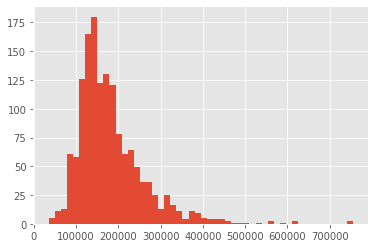

In [22]:
plt.hist(train_df["SalePrice"], bins = 50)
train_df3 = train_df
train_df3.loc[train_df3.SalePrice] = math.log(train_df3.SalePrice)
plt.hist(train_df3["SalePrice"], bins = 50)

In [97]:
outliers = train_df[train_df["SalePrice"] >= 419250]
outliers

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
349,350,60,RL,56.0,20431,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,New,Partial,437154
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
473,474,20,RL,110.0,14977,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,New,Partial,440000
496,497,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,430000
527,528,60,RL,67.0,14948,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,New,Partial,446261
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950


In [120]:
train_df2 = train_df[train_df["SalePrice"] < 419250]

yearly2 = train_df2.groupby("YrSold")
yearly2.SalePrice.describe() #all within $7,000 of each other

monthly2 = train_df2.groupby("MoSold")
monthly2.SalePrice.describe() #range is wider now - about $30,000

round(train_df2.SalePrice.describe())

count      1438.0
mean     175845.0
std       67476.0
min       34900.0
25%      129500.0
50%      161500.0
75%      210000.0
max      415298.0
Name: SalePrice, dtype: float64

In [86]:
#BASEMENT DESCRIPTIVE

train_df.BsmtQual.describe()

def frame_to_dict (x): 
    all_list = list(x)
    all_dict = {}
    for thing in all_list:
        all_dict[thing] = all_list.count(thing)
    return all_dict

bsmt_qual_dict = frame_to_dict(train_df['BsmtQual'])
bsmt_cond_dict = frame_to_dict(train_df['BsmtCond'])
bsmt_exposure_dict = frame_to_dict(train_df['BsmtExposure'])
bsmt_fin_1_dict = frame_to_dict(train_df['BsmtFinType1'])
bsmt_fin_2_dict = frame_to_dict(train_df['BsmtFinType2'])

    
print(bsmt_qual_dict)
print(bsmt_cond_dict)
print(bsmt_exposure_dict)
print(bsmt_fin_1_dict)
print(bsmt_fin_2_dict)


# bsmt_qual_df = pd.DataFrame(bsmt_qual_dict, index = range(5))
# bsmt_qual_df = bsmt_qual_df.loc[[0]]
# bsmt_qual_df.index = ["Count"]
# bsmt_qual_df.plot(kind = 'bar')

# #121 Excellent
# #618 Good
# #649 Typical
# #35 Fair
# #0 Poor
# #37 No Basement

# train_df.boxplot(by = "BsmtQual", column = "SalePrice")

{'Gd': 618, 'TA': 649, 'Ex': 121, nan: 37, 'Fa': 35}
{'TA': 1311, 'Gd': 65, nan: 37, 'Fa': 45, 'Po': 2}
{'No': 953, 'Gd': 134, 'Mn': 114, 'Av': 221, nan: 38}
{'GLQ': 418, 'ALQ': 220, 'Unf': 430, 'Rec': 133, 'BLQ': 148, nan: 37, 'LwQ': 74}
{'Unf': 1256, 'BLQ': 33, nan: 38, 'ALQ': 19, 'Rec': 54, 'LwQ': 46, 'GLQ': 14}


In [76]:
#train_df_basement = train_df[["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "BsmtFinSF1", ]]

train_df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [449]:
## new basement data frame

all_basement = train_df[["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFullBath", "BsmtHalfBath", "TotalBsmtSF", "SalePrice"]]

#log sale price

sale_list = list(train_df.SalePrice)
log_sale_list = list(map(lambda x: math.log(x), sale_list))
all_basement["LogSalePrice"] = log_sale_list
all_basement = all_basement.drop("SalePrice", axis = 1)

#combining full and half bath, just to indicate if it has bathrooms

bsmt_full_list = list(train_df.BsmtFullBath)
bsmt_half_list = list(train_df.BsmtHalfBath)
bsmt_has_bath_list = list(map(lambda x, y: x + y, bsmt_full_list, bsmt_half_list))
bsmt_has_bath_list = [bsmt_has_bath_list[x] - bsmt_has_bath_list[x] + 1 if bsmt_has_bath_list[x] >= 1 else bsmt_has_bath_list[x] * 0 for x in range(len(bsmt_has_bath_list))]
all_basement["BsmtHasBath"] = bsmt_has_bath_list
all_basement = all_basement.drop("BsmtFullBath", axis = 1)
all_basement = all_basement.drop("BsmtHalfBath", axis = 1)
all_basement = all_basement.fillna("None")

#dummification of basement categoricals

qual = pd.get_dummies(all_basement[["BsmtQual"]])
qual = qual.drop('BsmtQual_None', axis = 1)
#print(list(qual.columns))

cond = pd.get_dummies(all_basement[["BsmtCond"]])
cond = cond.drop("BsmtCond_None", axis = 1)
#print(list(cond.columns))

exposure = pd.get_dummies(all_basement[["BsmtExposure"]])
exposure = exposure.drop("BsmtExposure_None", axis = 1)
#print(list(exposure.columns))

fintype = pd.get_dummies(all_basement[["BsmtFinType1"]])
fintype = fintype.drop("BsmtFinType1_None", axis = 1)
#print(list(fintype.columns))

#combining into one data frame

all_basement = all_basement.drop(["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1"], axis = 1)   
all_basement = pd.concat([all_basement, qual, cond, exposure, fintype], axis = 1)
print(list(all_basement.columns))

['TotalBsmtSF', 'LogSalePrice', 'BsmtHasBath', 'BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf']


C:\Users\matth\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [450]:
#test linear model

base = linear_model.LinearRegression()
X = all_basement.drop("LogSalePrice", axis = 1)
#X = all_basement[['TotalBsmtSF']]
Y = all_basement[["LogSalePrice"]]

base.fit(X, Y)
print("Intercept: %f" %base.intercept_)
print("Coefficients: %s" %str(base.coef_))
print("R^2: %f" %(base.score(X, Y)))

#get coefficients for each variable

colnames = X.columns
result = pd.DataFrame(base.coef_).transpose()
result["variable"] = colnames
result.columns = ['coefficient', "variable"]
print(result)

coefficients = list(result.coefficient)
coefficients


Intercept: 11.529680
Coefficients: [[ 3.42889017e-04 -6.65592850e-03  3.59320405e-01 -2.06389743e-01
   1.03236723e-01 -1.55053859e-01  7.43901687e-02  2.85428727e-01
  -4.66983461e-01  2.08278090e-01 -1.20857376e-01 -3.66754039e-02
  -5.30900895e-02 -1.08274080e-01  1.75751236e-02  6.46527404e-04
   9.40002216e-02 -1.46356765e-02 -2.18488195e-03  5.71221090e-03]]
R^2: 0.578870
    coefficient          variable
0      0.000343       TotalBsmtSF
1     -0.006656       BsmtHasBath
2      0.359320       BsmtQual_Ex
3     -0.206390       BsmtQual_Fa
4      0.103237       BsmtQual_Gd
5     -0.155054       BsmtQual_TA
6      0.074390       BsmtCond_Fa
7      0.285429       BsmtCond_Gd
8     -0.466983       BsmtCond_Po
9      0.208278       BsmtCond_TA
10    -0.120857   BsmtExposure_Av
11    -0.036675   BsmtExposure_Gd
12    -0.053090   BsmtExposure_Mn
13    -0.108274   BsmtExposure_No
14     0.017575  BsmtFinType1_ALQ
15     0.000647  BsmtFinType1_BLQ
16     0.094000  BsmtFinType1_GLQ
17    -

[0.00034288901694869346,
 -0.006655928504863597,
 0.3593204047978721,
 -0.20638974307405497,
 0.10323672250430188,
 -0.15505385914956635,
 0.07439016874168675,
 0.285428726736025,
 -0.46698346051349293,
 0.20827809011433288,
 -0.12085737645478956,
 -0.03667540388787604,
 -0.053090089504574195,
 -0.10827407973041393,
 0.01757512364381449,
 0.0006465274036329731,
 0.09400022158671215,
 -0.014635676500978436,
 -0.002184881950009113,
 0.005712210895379545]

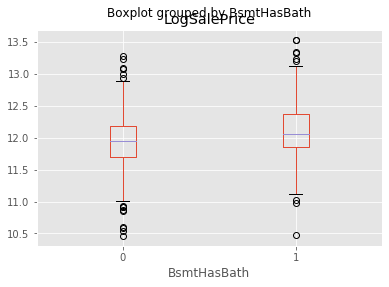

In [451]:
all_basement.boxplot(by = "BsmtHasBath", column = "LogSalePrice")

In [452]:
all_basement.corr()

,TotalBsmtSF,LogSalePrice,BsmtHasBath,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,...,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf
TotalBsmtSF,1.000000,0.612134,0.279531,0.403166,-0.115927,0.143856,-0.208065,-0.075510,0.037764,-0.019883,...,0.121298,0.292242,0.028378,-0.155783,-0.013082,-0.041752,0.317396,-0.016780,-0.030998,-0.115146
LogSalePrice,0.612134,1.000000,0.227907,0.463991,-0.159521,0.334332,-0.477611,-0.167556,0.106076,-0.088903,...,0.141955,0.270918,0.051577,-0.234837,-0.074617,-0.131562,0.440763,-0.082572,-0.135734,-0.097171
BsmtHasBath,0.279531,0.227907,1.000000,0.133975,-0.082873,0.062365,-0.063408,-0.086354,0.065659,0.002696,...,0.151458,0.246730,0.036543,-0.233400,0.184235,0.074507,0.428954,-0.027010,-0.031847,-0.534509
BsmtQual_Ex,0.403166,0.463991,0.133975,1.000000,-0.047112,-0.257538,-0.268915,-0.053608,0.067612,-0.011134,...,0.115650,0.197005,-0.004148,-0.187758,-0.098842,-0.092733,0.249286,-0.046809,-0.095168,-0.008922
BsmtQual_Fa,-0.115927,-0.159521,-0.082873,-0.047112,1.000000,-0.134266,-0.140197,0.179312,-0.033830,0.236325,...,-0.066189,-0.034311,0.037837,0.057880,-0.040979,-0.022965,-0.099262,0.045441,-0.034054,0.154145
BsmtQual_Gd,0.143856,0.334332,0.062365,-0.257538,-0.134266,1.000000,-0.766391,-0.136738,0.057040,-0.031730,...,0.160336,0.058960,0.029685,-0.129261,-0.070229,-0.163728,0.359013,-0.090521,-0.189323,0.018206
BsmtQual_TA,-0.208065,-0.477611,-0.063408,-0.268915,-0.140197,-0.766391,1.000000,0.119599,-0.072804,-0.033132,...,-0.181673,-0.141151,-0.024019,0.284801,0.158764,0.238443,-0.432418,0.113771,0.267674,-0.027650
BsmtCond_Fa,-0.075510,-0.167556,-0.086354,-0.053608,0.179312,-0.136738,0.119599,1.000000,-0.038494,-0.006605,...,-0.075316,-0.042964,0.021953,0.080130,-0.064038,-0.020505,-0.112949,0.103325,0.053721,0.102124
BsmtCond_Gd,0.037764,0.106076,0.065659,0.067612,-0.033830,0.057040,-0.072804,-0.038494,1.000000,-0.007995,...,0.038554,0.046403,-0.000933,-0.044837,0.020473,-0.039490,0.054294,0.025820,-0.033714,-0.022904
BsmtCond_Po,-0.019883,-0.088903,0.002696,-0.011134,0.236325,-0.031730,-0.033132,-0.006605,-0.007995,1.000000,...,-0.015642,0.052367,-0.010779,-0.011882,-0.015600,0.048917,-0.023458,-0.008558,-0.011725,0.016696


In [453]:
# first let me just add all the dummies to make a total dummy score

basement_dummies = all_basement.drop(["TotalBsmtSF", "LogSalePrice"], axis = 1)
basement_dummies["BsmtScore"] = basement_dummies.sum(axis = 1)
basement_dummies

all_basement["BsmtScore"] = list(basement_dummies["BsmtScore"])
all_basement

A = all_basement[["BsmtScore", "TotalBsmtSF"]]
B = all_basement[["LogSalePrice"]]

base.fit(A, B)
print("Intercept: %f" %base.intercept_)
print("Coefficients: %s" %str(base.coef_))
print("R^2: %f" %(base.score(A, B)))

# doesn't work, R^2 still too low

Intercept: 11.425766
Coefficients: [[0.00259422 0.00055509]]
R^2: 0.374733


In [466]:
result

,TotalBsmtSF,LogSalePrice,BsmtHasBath,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,...,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtScore
TotalBsmtSF,1.000000,0.612134,0.279531,0.403166,-0.115927,0.143856,-0.208065,-0.075510,0.037764,-0.019883,...,0.292242,0.028378,-0.155783,-0.013082,-0.041752,0.317396,-0.016780,-0.030998,-0.115146,0.462267
LogSalePrice,0.612134,1.000000,0.227907,0.463991,-0.159521,0.334332,-0.477611,-0.167556,0.106076,-0.088903,...,0.270918,0.051577,-0.234837,-0.074617,-0.131562,0.440763,-0.082572,-0.135734,-0.097171,0.683636
BsmtHasBath,0.279531,0.227907,1.000000,0.133975,-0.082873,0.062365,-0.063408,-0.086354,0.065659,0.002696,...,0.246730,0.036543,-0.233400,0.184235,0.074507,0.428954,-0.027010,-0.031847,-0.534509,0.240681
BsmtQual_Ex,0.403166,0.463991,0.133975,1.000000,-0.047112,-0.257538,-0.268915,-0.053608,0.067612,-0.011134,...,0.197005,-0.004148,-0.187758,-0.098842,-0.092733,0.249286,-0.046809,-0.095168,-0.008922,0.612622
BsmtQual_Fa,-0.115927,-0.159521,-0.082873,-0.047112,1.000000,-0.134266,-0.140197,0.179312,-0.033830,0.236325,...,-0.034311,0.037837,0.057880,-0.040979,-0.022965,-0.099262,0.045441,-0.034054,0.154145,-0.227386
BsmtQual_Gd,0.143856,0.334332,0.062365,-0.257538,-0.134266,1.000000,-0.766391,-0.136738,0.057040,-0.031730,...,0.058960,0.029685,-0.129261,-0.070229,-0.163728,0.359013,-0.090521,-0.189323,0.018206,0.549811
BsmtQual_TA,-0.208065,-0.477611,-0.063408,-0.268915,-0.140197,-0.766391,1.000000,0.119599,-0.072804,-0.033132,...,-0.141151,-0.024019,0.284801,0.158764,0.238443,-0.432418,0.113771,0.267674,-0.027650,-0.783542
BsmtCond_Fa,-0.075510,-0.167556,-0.086354,-0.053608,0.179312,-0.136738,0.119599,1.000000,-0.038494,-0.006605,...,-0.042964,0.021953,0.080130,-0.064038,-0.020505,-0.112949,0.103325,0.053721,0.102124,-0.273023
BsmtCond_Gd,0.037764,0.106076,0.065659,0.067612,-0.033830,0.057040,-0.072804,-0.038494,1.000000,-0.007995,...,0.046403,-0.000933,-0.044837,0.020473,-0.039490,0.054294,0.025820,-0.033714,-0.022904,0.180264
BsmtCond_Po,-0.019883,-0.088903,0.002696,-0.011134,0.236325,-0.031730,-0.033132,-0.006605,-0.007995,1.000000,...,0.052367,-0.010779,-0.011882,-0.015600,0.048917,-0.023458,-0.008558,-0.011725,0.016696,-0.159779


In [457]:
#let me try multiplying each dummy by their coefficient, then adding them together

all_basement["BsmtHasBath"]
all_basement["BsmtScore"] = all_basement["BsmtHasBath"] * -0.006656\
+ all_basement["BsmtQual_Ex"] * 0.359320 + all_basement["BsmtQual_Fa"] * -0.206390\
+ all_basement["BsmtQual_Gd"] * 0.103237 + all_basement["BsmtQual_TA"] * -0.155054\
+ all_basement["BsmtCond_Fa"] * 0.074390 + all_basement["BsmtCond_Gd"] *  0.285429\
+ all_basement["BsmtCond_Po"] * -0.466983 + all_basement["BsmtCond_TA"] * 0.208278\
+ all_basement["BsmtExposure_Av"] * -0.120857 + all_basement["BsmtExposure_Gd"] * -0.036675\
+ all_basement["BsmtExposure_Mn"] * -0.053090 + all_basement["BsmtExposure_No"] * -0.108274\
+ all_basement["BsmtFinType1_ALQ"] * 0.017575 + all_basement["BsmtFinType1_BLQ"] * 0.000647\
+ all_basement["BsmtFinType1_GLQ"] * 0.094000 + all_basement["BsmtFinType1_LwQ"] * -0.014636\
+ all_basement["BsmtFinType1_Rec"] * -0.002185 + all_basement["BsmtFinType1_Unf"] * 0.005712

In [464]:
#here comes the test!!

M = all_basement[["BsmtScore", "TotalBsmtSF"]]
N = all_basement[["LogSalePrice"]]

base.fit(M, N)
print("Intercept: %f" %base.intercept_)
print("Coefficients: %s" %str(base.coef_))
print("R^2: %f" %(base.score(M, N)))

#looks like the R^2 is exactly the same if I do the regression with the weight of the coefficients 
#What if I do it with the weights from the correlation matrix?

Intercept: 11.529680
Coefficients: [[9.99999601e-01 3.42889095e-04]]
R^2: 0.578870


In [467]:
all_basement.corr()

,TotalBsmtSF,LogSalePrice,BsmtHasBath,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,...,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtScore
TotalBsmtSF,1.000000,0.612134,0.279531,0.403166,-0.115927,0.143856,-0.208065,-0.075510,0.037764,-0.019883,...,0.292242,0.028378,-0.155783,-0.013082,-0.041752,0.317396,-0.016780,-0.030998,-0.115146,0.462267
LogSalePrice,0.612134,1.000000,0.227907,0.463991,-0.159521,0.334332,-0.477611,-0.167556,0.106076,-0.088903,...,0.270918,0.051577,-0.234837,-0.074617,-0.131562,0.440763,-0.082572,-0.135734,-0.097171,0.683636
BsmtHasBath,0.279531,0.227907,1.000000,0.133975,-0.082873,0.062365,-0.063408,-0.086354,0.065659,0.002696,...,0.246730,0.036543,-0.233400,0.184235,0.074507,0.428954,-0.027010,-0.031847,-0.534509,0.240681
BsmtQual_Ex,0.403166,0.463991,0.133975,1.000000,-0.047112,-0.257538,-0.268915,-0.053608,0.067612,-0.011134,...,0.197005,-0.004148,-0.187758,-0.098842,-0.092733,0.249286,-0.046809,-0.095168,-0.008922,0.612622
BsmtQual_Fa,-0.115927,-0.159521,-0.082873,-0.047112,1.000000,-0.134266,-0.140197,0.179312,-0.033830,0.236325,...,-0.034311,0.037837,0.057880,-0.040979,-0.022965,-0.099262,0.045441,-0.034054,0.154145,-0.227386
BsmtQual_Gd,0.143856,0.334332,0.062365,-0.257538,-0.134266,1.000000,-0.766391,-0.136738,0.057040,-0.031730,...,0.058960,0.029685,-0.129261,-0.070229,-0.163728,0.359013,-0.090521,-0.189323,0.018206,0.549811
BsmtQual_TA,-0.208065,-0.477611,-0.063408,-0.268915,-0.140197,-0.766391,1.000000,0.119599,-0.072804,-0.033132,...,-0.141151,-0.024019,0.284801,0.158764,0.238443,-0.432418,0.113771,0.267674,-0.027650,-0.783542
BsmtCond_Fa,-0.075510,-0.167556,-0.086354,-0.053608,0.179312,-0.136738,0.119599,1.000000,-0.038494,-0.006605,...,-0.042964,0.021953,0.080130,-0.064038,-0.020505,-0.112949,0.103325,0.053721,0.102124,-0.273023
BsmtCond_Gd,0.037764,0.106076,0.065659,0.067612,-0.033830,0.057040,-0.072804,-0.038494,1.000000,-0.007995,...,0.046403,-0.000933,-0.044837,0.020473,-0.039490,0.054294,0.025820,-0.033714,-0.022904,0.180264
BsmtCond_Po,-0.019883,-0.088903,0.002696,-0.011134,0.236325,-0.031730,-0.033132,-0.006605,-0.007995,1.000000,...,0.052367,-0.010779,-0.011882,-0.015600,0.048917,-0.023458,-0.008558,-0.011725,0.016696,-0.159779


In [468]:
all_basement["BsmtScore2"] = all_basement["BsmtHasBath"] * 0.227907\
+ all_basement["BsmtQual_Ex"] * 0.463991 + all_basement["BsmtQual_Fa"] * -0.159521\
+ all_basement["BsmtQual_Gd"] * 0.334332 + all_basement["BsmtQual_TA"] * -0.477611\
+ all_basement["BsmtCond_Fa"] * -0.167556 + all_basement["BsmtCond_Gd"] *  0.106076\
+ all_basement["BsmtCond_Po"] * -0.088903 + all_basement["BsmtCond_TA"] * 0.137899\
+ all_basement["BsmtExposure_Av"] * 0.141955 + all_basement["BsmtExposure_Gd"] * 0.270918\
+ all_basement["BsmtExposure_Mn"] * 0.051577 + all_basement["BsmtExposure_No"] * -0.234837\
+ all_basement["BsmtFinType1_ALQ"] * -0.074617 + all_basement["BsmtFinType1_BLQ"] * -0.131562\
+ all_basement["BsmtFinType1_GLQ"] * 0.440763 + all_basement["BsmtFinType1_LwQ"] * -0.082572\
+ all_basement["BsmtFinType1_Rec"] * -0.135734 + all_basement["BsmtFinType1_Unf"] * -0.097171

In [470]:
#here comes the test!!

O = all_basement[["BsmtScore2", "TotalBsmtSF"]]
P = all_basement[["LogSalePrice"]]

base.fit(O, P)
print("Intercept: %f" %base.intercept_)
print("Coefficients: %s" %str(base.coef_))
print("R^2: %f" %(base.score(O, P)))

#nope, R^2 is worse now. So BsmtScore only really works as a consolidation metric

Intercept: 11.567479
Coefficients: [[0.23981724 0.00039859]]
R^2: 0.527695


In [369]:
#misc features: 

train_df["LogSalePrice"] = log_sale_list
C = train_df[["MiscVal"]]
D = train_df[["LogSalePrice"]]
base.fit(C, D)
print("Intercept: %f" %base.intercept_)
print("Coefficients: %s" %str(base.coef_))
print("R^2: %f" %(base.score(C, D)))

train_df[["MiscVal"]]

not_zero = train_df[["MiscVal"]] != 0

rich_shit = train_df[not_zero]
rich_null = np.sum(rich_shit[["MiscVal"]].isnull())
print(rich_null)
print(np.sum(train_df[["MiscFeature"]].isnull()))

# miscFeature and miscVal, respectively, have about 96% of their data missing
# and miscVal has an incredibly weak relationship with LogSalePrice
# recommend we drop them both 

condition_dict = frame_to_dict(train_df["SaleCondition"])
print(condition_dict)

type_dict = frame_to_dict(train_df["SaleType"])
print(type_dict)

Intercept: 12.024752
Coefficients: [[-1.61196994e-05]]
R^2: 0.000401
MiscVal    1408
dtype: int64
MiscFeature    1406
dtype: int64
{'Normal': 1198, 'Abnorml': 101, 'Partial': 125, 'AdjLand': 4, 'Alloca': 12, 'Family': 20}
{'WD': 1267, 'New': 122, 'COD': 43, 'ConLD': 9, 'ConLI': 5, 'CWD': 4, 'ConLw': 5, 'Con': 2, 'Oth': 3}


In [380]:
#the most overfit model in the universe

train_df_all_dummies = pd.get_dummies(train_df)
train_df_all_dummies = train_df_all_dummies.fillna(0)


E = train_df_all_dummies.drop(['SalePrice',"LogSalePrice"], axis = 1)
F = train_df_all_dummies[["LogSalePrice"]]

base.fit(E, F)
print("Intercept: %f" %base.intercept_)
print("Coefficients: %s" %str(base.coef_))
print("R^2: %f" %(base.score(E, F)))

Intercept: 9.344102
Coefficients: [[-5.90202265e-06 -4.06424720e-04  8.56798346e-06  2.99574604e-06
   4.11543600e-02  3.61834592e-02  1.72046468e-03  8.51512835e-04
   7.45256874e-06  5.24187632e-05  4.52916357e-05 -4.92021057e-06
   9.27902190e-05  6.83906012e-05  6.09823493e-05  3.45059489e-05
   1.63878914e-04  2.46923557e-02  4.68275211e-03  1.82863599e-02
   2.27016103e-02  7.15162809e-03 -4.22749398e-02  4.48416488e-03
   1.15115186e-02 -3.41344817e-04  1.77963902e-02  1.30453477e-04
   9.34094822e-05  3.39716867e-05  1.28546313e-04  1.58575700e-04
   2.73743347e-04  1.58498808e-03 -4.50910761e-06 -5.07185888e-04
  -2.15822623e-03 -3.36597848e-01  1.11177662e-01  9.24680887e-02
   8.60575520e-02  4.68945456e-02 -4.88277272e-02  4.88277272e-02
   9.56112154e-03  2.10083486e-02 -1.39796760e-02  1.12348841e-02
   9.36468917e-03 -6.61989732e-03 -9.50646812e-03  2.02617782e-02
  -2.87913048e-02  1.80359947e-02  1.15490668e-01 -1.15490668e-01
   2.63913253e-02  4.71275032e-02 -1.40755

In [494]:
bsmt = all_basement.drop("BsmtScore2", axis = 1)
misc = train_df[["MiscFeature", "MiscVal", "MoSold", "SaleType", "SaleCondition"]]
bsmt_and_misc_w_null = pd.concat([bsmt, misc], axis = 1)
np.sum(bsmt_and_misc.isnull())

TotalBsmtSF      0
BsmtScore        0
LogSalePrice     0
MiscFeature      0
MiscVal          0
MoSold           0
SaleType         0
SaleCondition    0
dtype: int64

In [495]:
bsmt_and_misc = bsmt_and_misc_w_null.fillna("No Feature")

In [496]:
#here's my data frame! 

bsmt_and_misc

,TotalBsmtSF,LogSalePrice,BsmtHasBath,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,...,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtScore,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition
0,856,12.247694,1,0,0,1,0,0,0,0,...,1,0,0,0,0.290585,No Feature,0,2,WD,Normal
1,1262,12.109011,1,0,0,1,0,0,0,0,...,0,0,0,0,0.285759,No Feature,0,5,WD,Normal
2,920,12.317167,1,0,0,1,0,0,0,0,...,1,0,0,0,0.345769,No Feature,0,9,WD,Normal
3,756,11.849398,1,0,0,0,1,0,1,0,...,0,0,0,0,0.033020,No Feature,0,2,WD,Abnorml
4,1145,12.429216,1,0,0,1,0,0,0,0,...,1,0,0,0,0.278002,No Feature,0,12,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,12.072541,0,0,0,1,0,0,0,0,...,0,0,0,1,0.208953,No Feature,0,8,WD,Normal
1456,1542,12.254863,1,0,0,1,0,0,0,0,...,0,0,0,0,0.214160,No Feature,0,2,WD,Normal
1457,1152,12.493130,0,0,0,0,1,0,1,0,...,1,0,0,0,0.116101,Shed,2500,5,WD,Normal
1458,1078,11.864462,1,0,0,0,1,0,0,0,...,1,0,0,0,0.087478,No Feature,0,4,WD,Normal
